# Chapter 18: Reinforcementt Learning
This work is partialy combined text and code from the book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is only supposed to be used as reference and is recommended to follow along with a copy of the Book purchased.

In [ ]:
"""
  From stackoverflow question
  https://stackoverflow.com/questions/53472940/nameerror-name-base-is-not-defined-openai-gym
"""
# install required system dependencies
!apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[CartPole-v1]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,981 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 994 kB in 1s (1,174 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import gym


# To get smooth animations
%matplotlib inline
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Learning to Optimize Rewards
In Reinforcement Learning, a software *agent* makes  *observations*  and takes *actions* within an *enivornment*, and in returns it recieves *rewards* or *punishment* depending on the objective.

The objective is to learn to act in a way that will maximise its expected rewards over time.

## Policy Search
<mark>The algorithm a software agent uses to determine its actions is called its *policy*.</mark>

# Introduction to OpenAI gym

In [ ]:
import gym

env = gym.make("CartPole-v1")
obs = env.reset() # After creating the environment; 
                  # intialize it -> returns the first observations
"""
[cart's horizontal position,
 velociy,
 the angle of the pole,
 angular velocity]
"""
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

In [ ]:
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [ ]:
"""
 Next 2 cells from 
 https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_01_ai_gym.ipynb
""" 
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 300px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("CartPole-v1"))

observation = env.reset()

while True:
    env.render()
    #your agent goes here
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action)    
    if done: 
      break;

show_video()

In [ ]:
env.render()

True

In [ ]:
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

Notice that the cart is now moving toward the right (`obs[1]` > 0). The pole is still tilted toward the left (`obs[2]` < 0), but its angular velocity is now positive (`obs[3]` > 0), so it will likely be tilted toward the right after the next steps as we accelerate it left.

In [ ]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

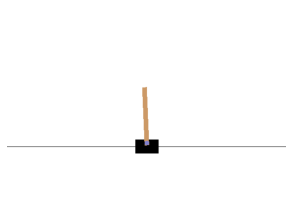

In [ ]:
plot_environment(env)

What actions are possible?

In [ ]:
env.action_space

Discrete(2)

Can do two actions; accelerate left(0) or right(1).

Let's accelerate the cart towards the left.

In [ ]:
obs

array([-0.0496869 ,  0.00416091, -0.00094953,  0.01021633])

In [ ]:
action = 0
obs, reward, done, info = env.step(action)

obs

array([ 0.02039252, -0.22988154,  0.00276078,  0.2784961 ])

In [ ]:
reward

1.0

In [ ]:
done

False

In [ ]:
info

{}

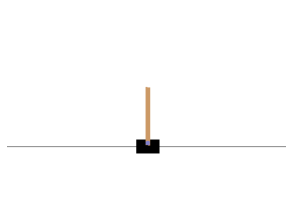

In [ ]:
plot_environment(env)

The `step()` method executed the given action and returned four value:

- `obs` 

  This is the new observation. The cart is moving towards the left (`obs[1] < 0`), and the angular velocity is positive i.e, in the clockwise direction (`obs[3]>0`) while being tilted towards right(`obs[2]>0`).

- `reward`

  In this environment, you get a reward of 1.0 at every step, no matter what.

- `done`

  This value becomes true when the episode is over.

- `info`

  Environment specific dictionary to provide some extra information.

  

Let's create a simple policy to accelerate left when the pole is leaning left and right otherwise.

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []
env = gym.make("CartPole-v1")
obs = env.reset()

In [ ]:
for episode in range(500):
  episode_rewards = 0
  obs = env.reset()
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    episode_rewards += reward
    if done:
      break
  totals.append(episode_rewards)

In [ ]:
pd.Series({"Mean": np.mean(totals),
           "Std":  np.std(totals),
           "Min":  np.min(totals),
           "Max":  np.max(totals)})

Mean    41.768000
Std      8.866238
Min     24.000000
Max     68.000000
dtype: float64

Let's visualize one episode:

In [ ]:
# This cell don't show any video | try the next cell for animation
env = wrap_env(gym.make("CartPole-v1"))

observation = env.reset()

while True:
    env.render()
    env.reset()
    #your agent goes here
    for step in range(200):
      action = basic_policy(obs)
      observation, reward, done, info = env.step(action)
      if done:
        break;
    break;


show_video()
env.close()

In [ ]:
env = gym.make("CartPole-v1")

env.reset()
env.render()
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
plot_animation(frames)

# Neural Network Policies
Now let's see how good a nerural network do good than a simple hard-coded policy.

For this we are going to create a Neural network that takes the observations as input, and outputs the action (in our case `0` or `1`) with some probability. We will then choose the action randomly with that probability.

This lets the agen i.e., the neural network find the right balance between *exploring*  new actions and *exploiting* the actions that are already well known to work well.


In [ ]:
keras.backend.clear_session()

n_inputs = 4 # = env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid")
])

Let's write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [ ]:
def render_policy_net(model, n_max_steps=200,  seed=42):
  frames = []
  env = gym.make("CartPole-v1")
  env.seed(seed)
  np.random.seed(seed)
  obs = env.reset()
  for step in range(n_max_steps):
    frames.append(env.render(mode="rgb_array"))
    left_proba = model.predict(obs.reshape(1, -1))
    action = int(np.random.rand() > left_proba)
    obs, reward, done, info = env.step(action)
    if done:
      break;
  env.close()
  return frames

In [ ]:
obs.reshape(1,-1).shape

(1, 4)

Now let's look at how well this randomly initialized policy network performs:

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

Still pretty bad...

We can make the same net play in 50 different environments in parallel (this will give us a diverse training batch at each step), and train for 5000 iterations. We also reset environments when they are done. We train the model using a custom training loop so we can easily use the predictions at each training step to advance the environments.

In [ ]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.096

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

So, atleast now the model seem to learned the basic policy. But what can be done to make it better.

# Evaluating Actions: The Credit Assignment Problem
The credit assignment problem occurs when the agent gets a reward, it is hard for it to know which actions should get credited (or blamed) for it.

To solve this a common strategy is to <mark>evaluate an action based on the sum of all the rewards that come after it, usually applying a *discout factor $\gamma$* at each step.</mark>

<mark>This sum of discounted rewards is called the action's ***return.***</mark>

***Action advantage*** is a term used when we want to estimate how much better or worse an action is, compared to the other possible actions, on average. <mark>To get action advantage calculated we must run many episodes and normalize all the action returns (by substracting the mean and dividing by the standard deviation).</mark>

# Policy Gradients
Let's go through a one popular class of PG algorithms, called ***REINFORCE*** algorithms's variant:
- To start off let the neural network policy play the game several time and at each time step compute the gradients but  don't apply them yet.
- Next, compute each *action's avantange*.
- If an action's advantage is:
  - Positve: action was good; apply the gradients making it even more likely in future.
  - Negative:  action was bad; apply the opposite gradients to make the action *less* likely in the future.
- At last compute the mean of all the resulting gradient vectors and perform a Gradient Descent step.


We are going to implement this in keras. 

First let's write a function to just Play one step.

In [ ]:
def play_one_step(env, obs, model, loss_fn):
  """
  returns observation, reward, done, gradients
  
  Take a next step by the environment depending on 
  the action taken by the agent (depending on probabilty calculated by model) 
  and compute gardients But don't apply it instead returns it.
  """
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])                         # reshape the obs to make a batch
    print("left_proba: ", left_proba)
    action = (tf.random.uniform([1, 1]) > left_proba)           # get the action depending on the left_proba
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))
  grads = tape.gradient(loss, model.trainable_variables)
  obs, reward, done, info = env.step(int(action[0, 0].numpy()))
  return obs, reward, done, grads

Then we write anther funtion that uses our previousky defined function `play_one_step()` to instead play multiple episodes.

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
  """
  returns all_rewards, all_grads for n_episodes each played n_max_steps times

  all_rewards: one reward list per episode, 
               containing one reward per step
  all_grads:   one gradient list per episode,
               each containing one tuple of gradients per step and 
               each tuple containing one gradient tensor per trainable variable
  """
  all_rewards = []
  all_grads = []
  for episode in range(n_episodes):
    current_rewards = []
    current_grads = []
    obs = env.reset()
    for step in range(n_max_steps):
      obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
      current_rewards.append(reward)
      current_grads.append(grads)
      if done:
        break;
    all_rewards.append(current_rewards)
    all_grads.append(current_grads)
  return all_rewards, all_grads

Now we'll have to look at these computed rewards, discount them, and normalize them.

In [ ]:
def discount_rewards(rewards, discount_factor):
  discounted = np.array(rewards)
  for step in range(len(rewards) - 2, -1, -1):
    discounted[step] += discounted[step + 1] * discount_factor
  return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
  all_discounted_rewards = [discount_rewards(ep_rewards, discount_factor)
                          for ep_rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  return [(discounted_rewards - reward_mean) / reward_std
          for discounted_rewards in all_discounted_rewards]

Let's check the two functions:

In [ ]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

Now, it's time to build our *REINFORCE* algorithm. before that we define the hyperameters.

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

and the optimizer and the loss function.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

And at last our custom training loop.

In [ ]:
env = gym.make("CartPole-v1")
env.reset()

for iteration in range(n_iterations):
  all_rewards, all_grads = play_multiple_episodes(
      env, n_episodes_per_update, n_max_steps, model, loss_fn
  )
  all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor=0.8)

  all_mean_grads = []
  for var_index in range(len(model.trainable_variables)):
    mean_grads = tf.reduce_mean(
        [final_reward * all_grads[episode_index][step][var_index]
         for episode_index, final_rewards in enumerate(all_final_rewards)
             for step, final_reward in enumerate(final_rewards)]
    , axis=0)
    all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Streaming output truncated to the last 5000 lines.
left_proba:  tf.Tensor([[0.3266409]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.11922526]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.30892444]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.1106354]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.28675932]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.59817255]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.2851851]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.59753776]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.85605574]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.63017887]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.3196609]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.6447044]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.33507174]], shape=(1, 1), dtype=float32)
left_proba:  tf.Tensor([[0.6627704]], shape=(1, 1), dtype=float32)
lef

In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
env = gym.make("CartPole-v1")

env.reset()
env.render()
env.seed(42)

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

There is another popular class of algorithms in which the agent learns to estimate the expected return for each action in each state, then using this knowledge to decide how to act instead of just  trying to optimize the policy incrementally in order to increase rewards. Introducing...

# Markov Decision Processes
<mark>Markov chains are those processes that has a fixed number of states and it can transition from one state to another at each  step. The probability for it to evolve from a state $s$ to $s'$  is fixed, and it depends only on the pair $(s, s')$ but not on past states.</mark>

*Markov decision processes* were discribed by Richard Bellman where <mark>at each step, an agent can choose one of several possible actions, and the transition probabilities depend on the chosen action.</mark>

**Optimal state value** $V^*(s)$ <mark>for any state $s$ is the sum of all discounted future rewards the agent can expect on average after it reaches a state $s$.</mark>

**Bellman Optimality Equation** <mark>states that if the agent acts optimally, then the optimal state value for the current state is equal to the reward it will get on average after taking one optimal action, plus the expected optimal value of all possible next states that this action can lead to.</mark>

*Equation 18-1 Bellman Optimality Equation*
$$V^*(s) = \max_a\sum_s T(s, a, s')[R(s, a, s') + \gamma.V^*(s')] \qquad \text{for all $s$}$$

In this equation:
- $T(s, a, s')$ is the transition probability from state $s$ to state $s'$, given that the agent choses the action $a$.
- $R(s, a, s')$ is the reward  that the agent gets when it goes  from state $s$ to $s'$, given that the agen chose action $a$.
- $\gamma$ is the discount factor.

